最速下降法的步骤：  
Step 1：选取初始点$x_0$，给定终止误差$\epsilon>0$，令$k:=0$；  
Step 2：计算$\triangledown f(x_k)$，若$\parallel\triangledown f(x_k)\parallel\leq\epsilon$，停止迭代，输出$x_k$.否则进行Step 3;   
Step 3：取$p_k=-\triangledown f(x_k)$;   
Step 4：进行一维搜索，求$t_k$，使得$$f(x_k+t_kp_k)=\mathop{min}f(x_k+tp_k)$$
令$x_{k+1}=x_k+t_kp_k$，$k:=k+1$，转到Step 2.

### 题目
$minf(x,y)=200x^2+y^2$   
$(x_0,y_0)=(100,1)$   
$\epsilon=10^{-5}$   

In [1]:
import numpy as np
from sympy import *
import math
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist

In [2]:
# 定义符号
x, y, t = symbols('x, y, t')

In [3]:
def func():
    # 自定义一个函数
    return 200 * pow(x, 2) + pow(y, 2)


def grad(data):
    # 求梯度向量,data=[data1, data2]
    f = func()
    grad_vec = [diff(f, x), diff(f, y)]  # 求偏导数,梯度向量
    grad = []
    for item in grad_vec:
        grad.append(item.subs(x, data[0]).subs(y, data[1]))
    return grad


def grad_len(grad):
    # 梯度向量的模长
    vec_len = math.sqrt(pow(grad[0], 2) + pow(grad[1], 2))
    return vec_len


def zhudian(f):
    # 求得min(t)的驻点
    t_diff = diff(f)
    t_min = solve(t_diff)
    return t_min

In [4]:
def main(X0, theta):
    f = func()
    grad_vec = grad(X0)
    grad_length = grad_len(grad_vec)  # 梯度向量的模长
    k = 0
    data_x = [0]
    data_y = [0]
    while grad_length > theta:  # 迭代的终止条件
        k += 1
        p = -np.array(grad_vec)
        # 迭代
        X = np.array(X0) + t * p
        t_func = f.subs(x, X[0]).subs(y, X[1])
        t_min = zhudian(t_func)
        X0 = np.array(X0) + t_min * p
        grad_vec = grad(X0)
        grad_length = grad_len(grad_vec)
        print('grad_length', grad_length)
        print('坐标', X0[0], X0[1])
        data_x.append(X0[0])
        data_y.append(X0[1])

    print(k)

    # 绘图
    fig = plt.figure()
    ax = axisartist.Subplot(fig, 111)
    fig.add_axes(ax)
    ax.axis["bottom"].set_axisline_style("-|>", size=1.5)
    ax.axis["left"].set_axisline_style("->", size=1.5)
    ax.axis["top"].set_visible(False)
    ax.axis["right"].set_visible(False)
    plt.title(r'$Gradient \ method - steepest \ descent \ method$')
    plt.plot(data_x, data_y,
             label=r'$f(x,y)=200x^2+y^2$')
    plt.legend()
    plt.scatter(1, 1, marker=(5, 1), c=5, s=1000)
    plt.grid()
    plt.xlabel(r'$x$', fontsize=20)
    plt.ylabel(r'$y$', fontsize=20)
    plt.show()

grad_length 1.990000002462625
坐标 -19900/80000000001 79600000000/80000000001
grad_length 0.019800490124258056
坐标 7920200000000/160000080002000001 79202000000/160000080002000001
grad_length 9.85074383669525e-07
坐标 -1576119800000000/12800006400320000160002000001 6304479200000000000000/12800006400320000160002000001
3


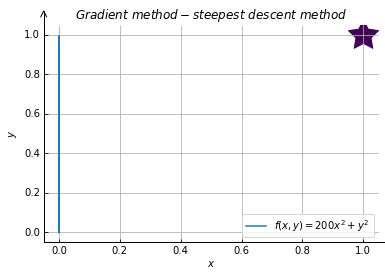

In [5]:
if __name__ == '__main__':
    # 给定初始迭代点和阈值
    main([100, 1], 10e-5)